## 20164567 곽태인

In [77]:
import math
import seaborn as sns
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime
from pandas import DataFrame as df

## 1번

In [78]:
start = datetime(2010,1,1)
end = datetime(2020,9,30)

hc = pdr.DataReader('005380.KS','yahoo',start,end) #현차
nv = pdr.DataReader('035420.KS','yahoo',start,end) #네이버
sh = pdr.DataReader('000660.KS','yahoo',start,end) #sk하이닉스
st = pdr.DataReader('017670.KS','yahoo',start,end) #sk텔레콤
ss = pdr.DataReader('005930.KS','yahoo',start,end) #삼전

In [79]:
eqt1 = pd.concat([hc['Close'], nv['Close'], sh['Close'], st['Close'], ss['Close']],axis=1)
eqt1.columns=['HC', 'NV', 'SH', 'ST', 'SS']
eqt1.head()

,HC,NV,SH,ST,SS
Date,,,,,
2010-01-04,119000.0,47312.800781,24100.0,170000.0,16180.0
2010-01-05,110000.0,47312.800781,23350.0,168500.0,16440.0
2010-01-06,111000.0,47067.699219,24550.0,169000.0,16820.0
2010-01-07,106000.0,47190.300781,24400.0,171500.0,16260.0
2010-01-08,106000.0,45596.800781,24650.0,169500.0,16420.0


In [128]:
#평균/표준편차를 위한 과정
df1=eqt1.mean()
df2=eqt1.std()

In [ ]:
#아마 변동계수를 확인하라는 것으로 판단되어 표준편차/평균도 추가하겠습니다.

In [130]:
df=eqt1
stats = df.describe()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
stats.loc['mean/std'] = df1/df2.tolist()
stats.loc['std/mean'] = df2/df1.tolist()
print(stats)

                     HC             NV             SH             ST  \
count       2647.000000    2647.000000    2647.000000    2647.000000   
mean      169813.864753  119453.640176   46829.316207  214582.551190   
std        44825.832100   56026.214656   23034.088291   43857.898954   
min        65900.000000   39468.199219   15600.000000  120500.000000   
25%       134500.000000   61837.648438   27450.000000  172500.000000   
50%       157000.000000  128200.000000   38400.000000  223000.000000   
75%       215000.000000  155600.000000   69800.000000  249000.000000   
max       268500.000000  339000.000000  105000.000000  301000.000000   
skew           0.377801       0.633236       0.659248      -0.298096   
kurt          -1.063619       1.000705      -1.012374      -1.035011   
mean/std       3.788304       2.132103       2.033044       4.892677   
std/mean       0.263970       0.469021       0.491873       0.204387   

                    SS  
count      2647.000000  
mean      323

## 전반적으로 skew가 음수를 나타내야 하는데 개별종목에서는 가끔은 양수를 띄는 경우가 있다. 여기에서는 sk텔레콤을 제외한 모든 개별종목의 skew가 양수임을 보여준다. kurt를 살펴보면 3이상일 경우 꼬리가 두껍다고 할 수 있는데 모든 개별종목에서 그렇지 않음을 알 수 있다. 변동계수를 살펴보면 sk하이닉스, 네이버, 삼성전자, 현대차, sk텔레콤 순으로 변동성이 큼을 알 수 있다.


# 2번

In [82]:
eqt1.corr()

,HC,NV,SH,ST,SS
HC,1.000000,-0.401592,-0.564381,-0.443649,-0.479310
NV,-0.401592,1.000000,0.734833,0.665217,0.762910
SH,-0.564381,0.734833,1.000000,0.623364,0.934225
ST,-0.443649,0.665217,0.623364,1.000000,0.555734
SS,-0.479310,0.762910,0.934225,0.555734,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216597B8040>,
      dtype=object)

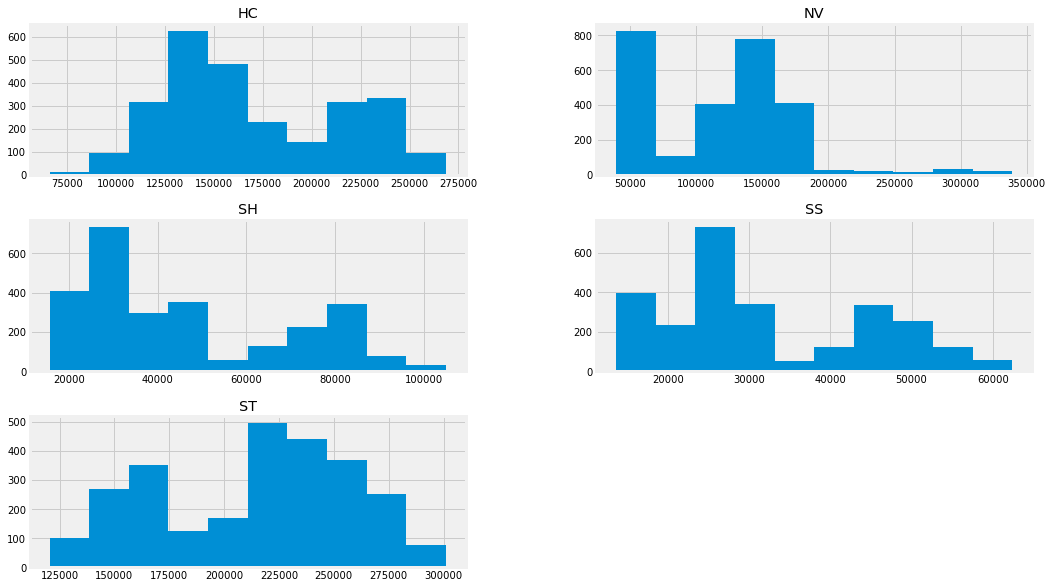

In [83]:
eqt1.hist(figsize=(16,10))

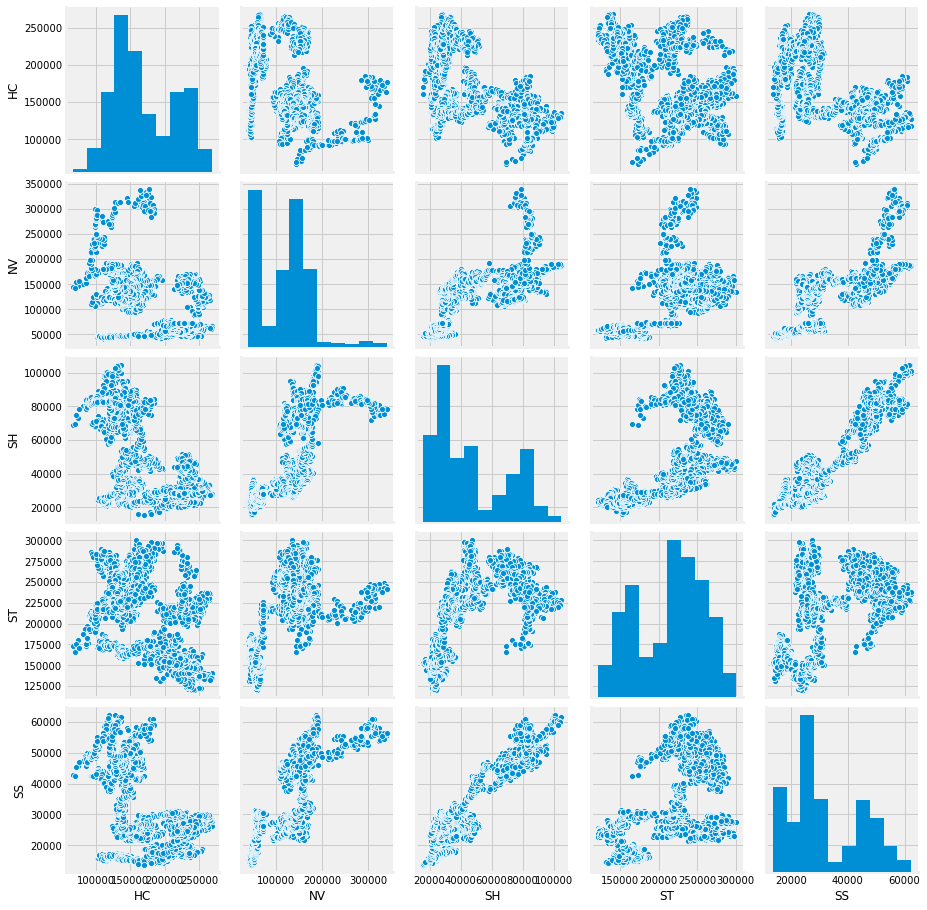

In [84]:
sns.pairplot(eqt1)

## 개별종목에서의 상관관계를 먼저 살펴보면 네이버는 SK하이닉스, 삼성전자와의 상관계수가 어느정도 높고, SK하이닉스는 삼성전자와의 상관계수가 높다. 이를 pairplot에서 살펴보면 상관계수가 높은 종목관의 그래프에서는 어느정도 선형성을 띄게 된다.

## 3번 (a)

In [85]:
short_window = 20
long_window1 = 40
long_window2 = 80

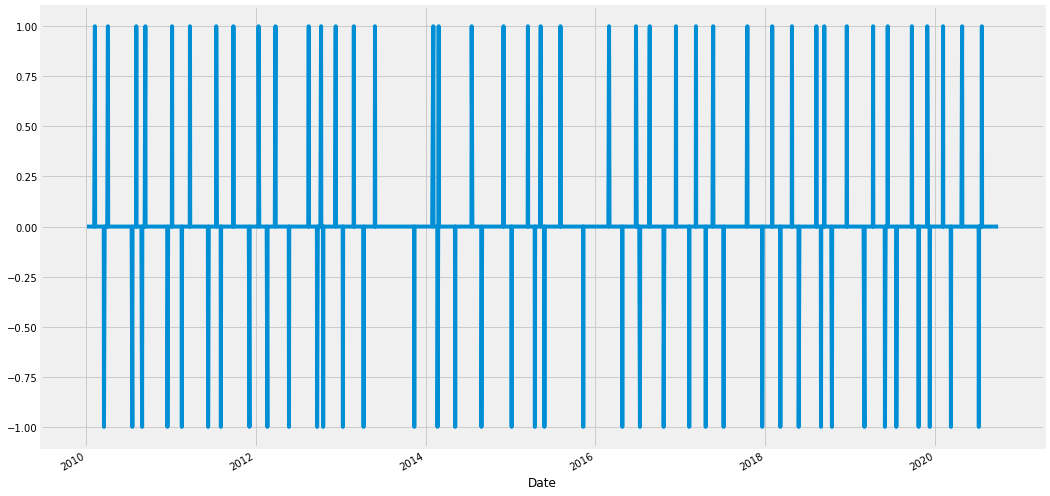

In [86]:
# 현대차 첫 번째 전략
signals1_hc = pd.DataFrame(index=hc.index)
signals1_hc['signal'] = 0.0

signals1_hc['short_mavg'] = hc['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals1_hc['long_mavg'] = hc['Close'].rolling(window=long_window1, min_periods=1, center=False).mean()

signals1_hc['signal'][short_window:] = np.where(signals1_hc['short_mavg'][short_window:] 
                                            > signals1_hc['long_mavg'][short_window:], 1.0, 0.0)   

signals1_hc['positions'] = signals1_hc['signal'].diff()

signals1_hc.positions.plot(figsize=(16,9))

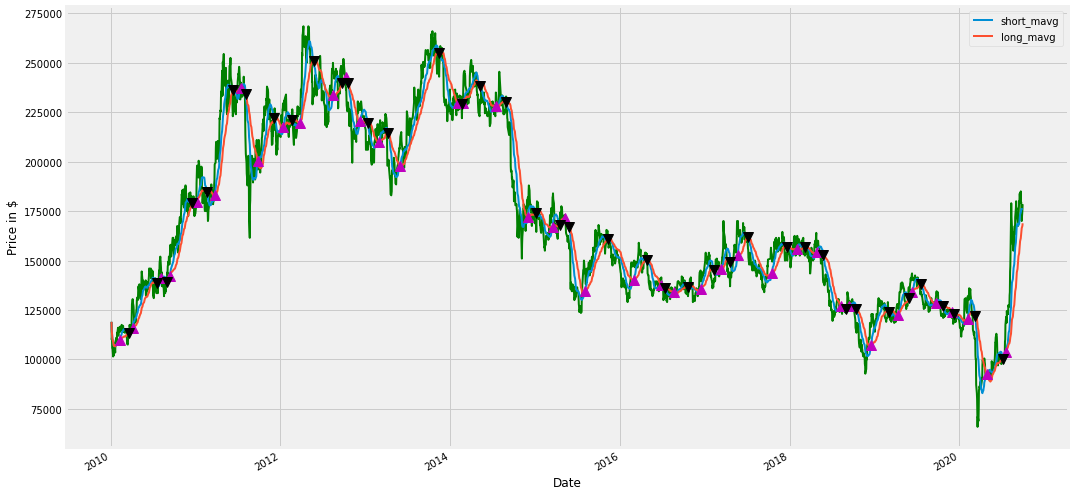

In [87]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

hc['Close'].plot(ax=ax1, color='g', lw=2.)

signals1_hc[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals1_hc.loc[signals1_hc.positions == 1.0].index, 
         signals1_hc.short_mavg[signals1_hc.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals1_hc.loc[signals1_hc.positions == -1.0].index, 
         signals1_hc.short_mavg[signals1_hc.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

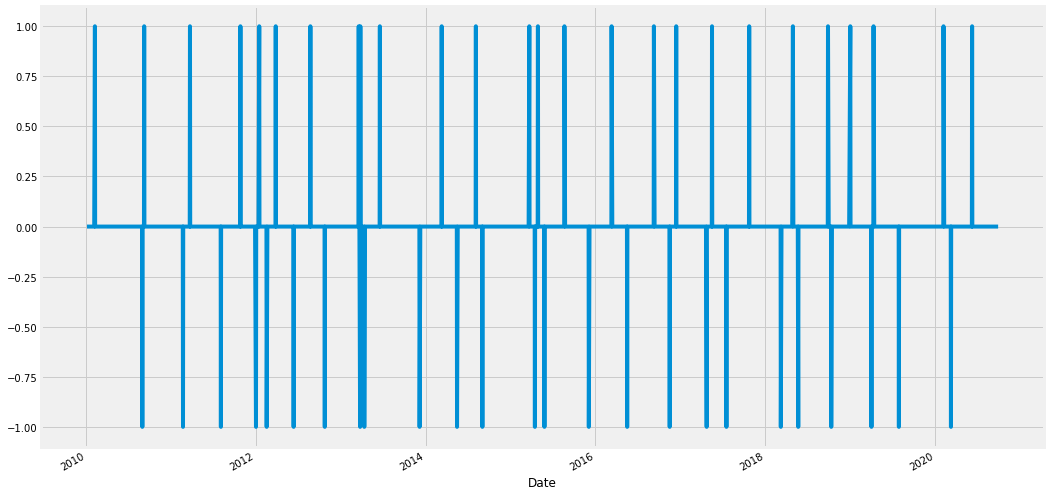

In [88]:
# 현대차 두번째 전략
signals2_hc = pd.DataFrame(index=hc.index)
signals2_hc['signal'] = 0.0

signals2_hc['short_mavg'] = hc['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals2_hc['long_mavg'] = hc['Close'].rolling(window=long_window2, min_periods=1, center=False).mean()

signals2_hc['signal'][short_window:] = np.where(signals2_hc['short_mavg'][short_window:] 
                                            > signals2_hc['long_mavg'][short_window:], 1.0, 0.0)   

signals2_hc['positions'] = signals2_hc['signal'].diff()

signals2_hc.positions.plot(figsize=(16,9))

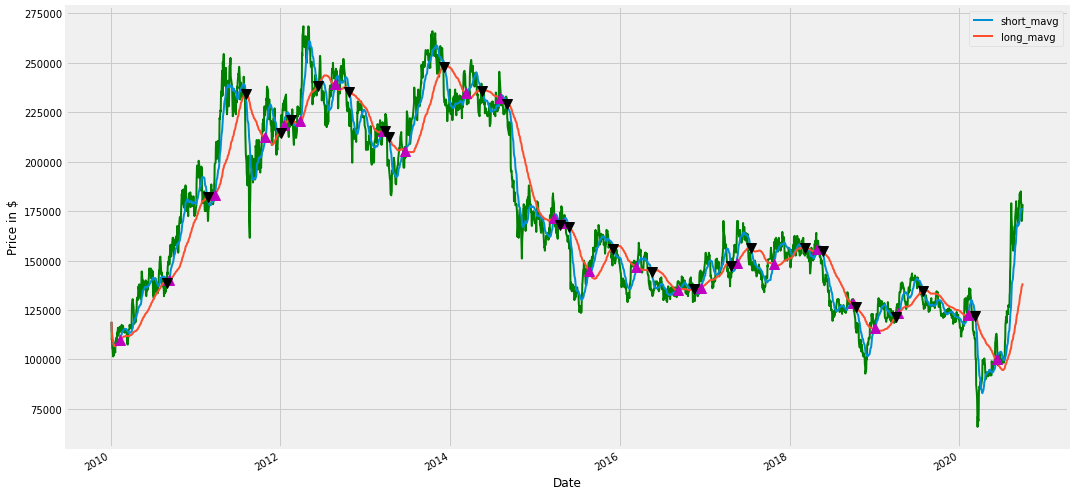

In [89]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

hc['Close'].plot(ax=ax1, color='g', lw=2.)

signals2_hc[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals2_hc.loc[signals2_hc.positions == 1.0].index, 
         signals2_hc.short_mavg[signals2_hc.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals2_hc.loc[signals2_hc.positions == -1.0].index, 
         signals2_hc.short_mavg[signals2_hc.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

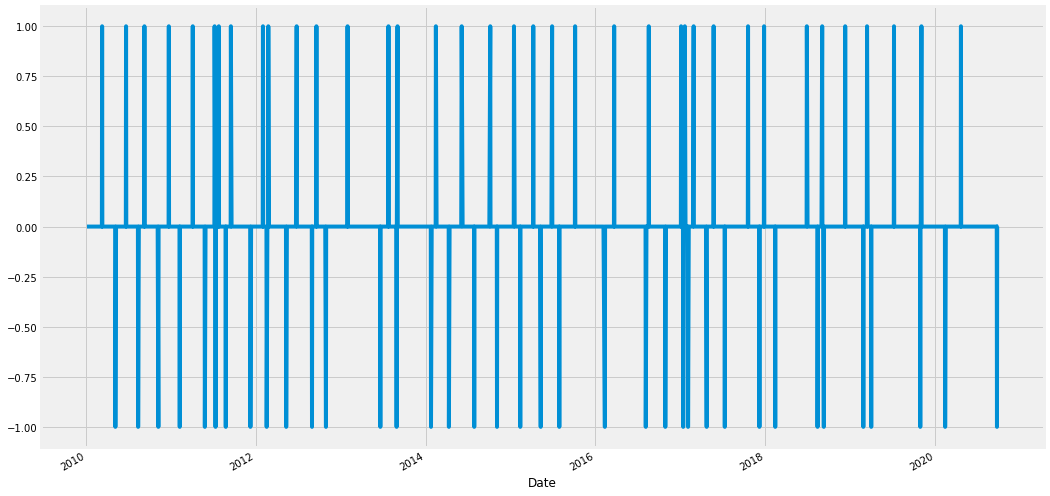

In [90]:
# 네이버 첫 번째 전략
signals1_nv = pd.DataFrame(index=nv.index)
signals1_nv['signal'] = 0.0

signals1_nv['short_mavg'] = nv['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals1_nv['long_mavg'] = nv['Close'].rolling(window=long_window1, min_periods=1, center=False).mean()

signals1_nv['signal'][short_window:] = np.where(signals1_nv['short_mavg'][short_window:] 
                                            > signals1_nv['long_mavg'][short_window:], 1.0, 0.0)   

signals1_nv['positions'] = signals1_nv['signal'].diff()

signals1_nv.positions.plot(figsize=(16,9))

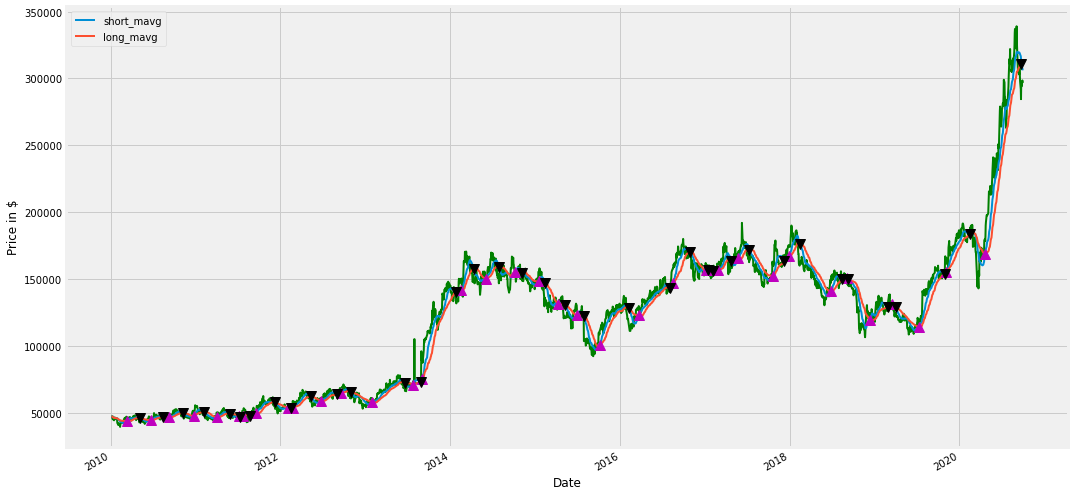

In [91]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

nv['Close'].plot(ax=ax1, color='g', lw=2.)

signals1_nv[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals1_nv.loc[signals1_nv.positions == 1.0].index, 
         signals1_nv.short_mavg[signals1_nv.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals1_nv.loc[signals1_nv.positions == -1.0].index, 
         signals1_nv.short_mavg[signals1_nv.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

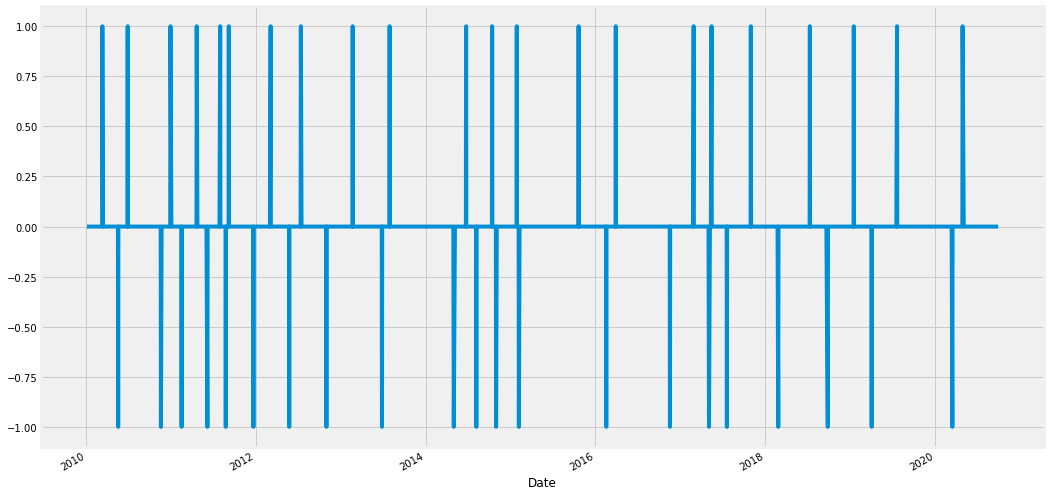

In [92]:
# 네이버 두번째 전략
signals2_nv = pd.DataFrame(index=nv.index)
signals2_nv['signal'] = 0.0

signals2_nv['short_mavg'] = nv['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals2_nv['long_mavg'] = nv['Close'].rolling(window=long_window2, min_periods=1, center=False).mean()

signals2_nv['signal'][short_window:] = np.where(signals2_nv['short_mavg'][short_window:] 
                                            > signals2_nv['long_mavg'][short_window:], 1.0, 0.0)   

signals2_nv['positions'] = signals2_nv['signal'].diff()

signals2_nv.positions.plot(figsize=(16,9))

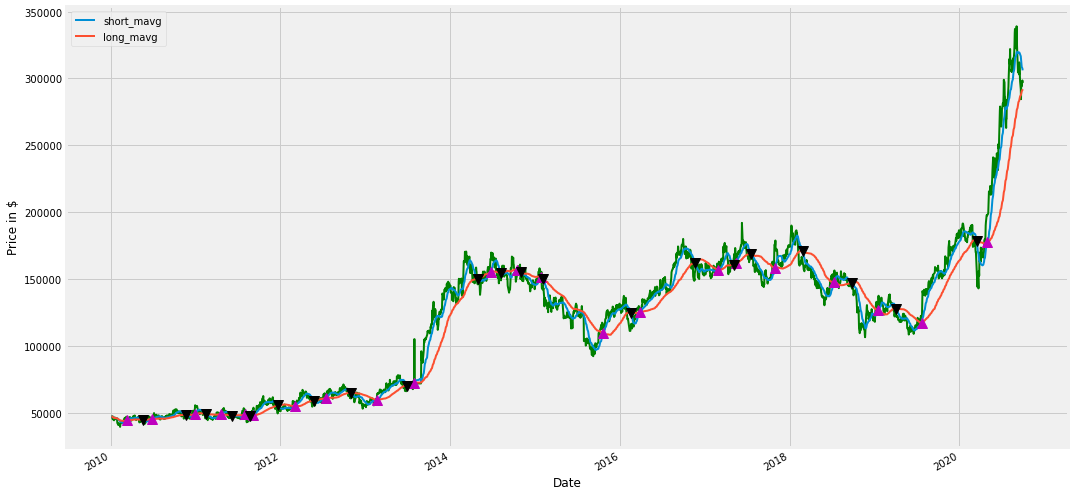

In [93]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

nv['Close'].plot(ax=ax1, color='g', lw=2.)

signals2_nv[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals2_nv.loc[signals2_nv.positions == 1.0].index, 
         signals2_nv.short_mavg[signals2_nv.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals2_nv.loc[signals2_nv.positions == -1.0].index, 
         signals2_nv.short_mavg[signals2_nv.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

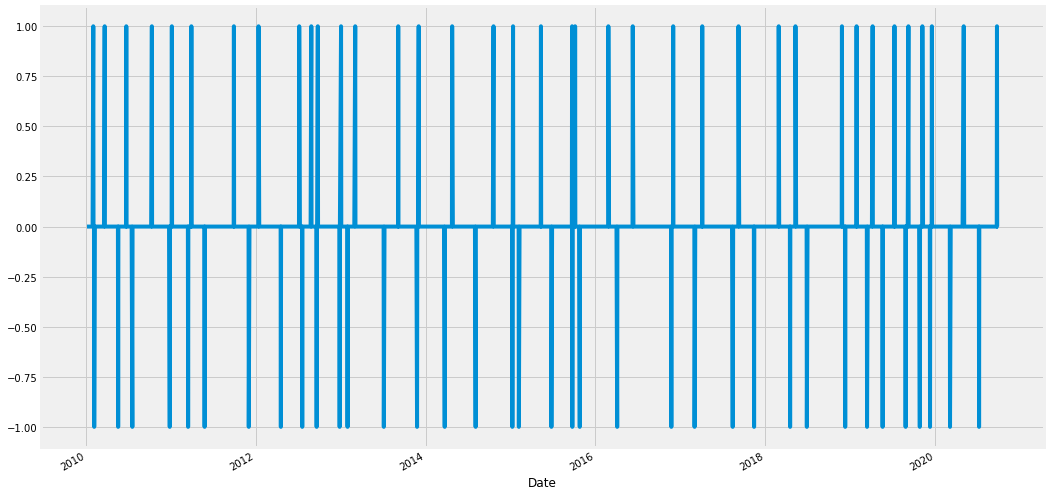

In [94]:
# sk하이닉스 첫 번째 전략
signals1_sh = pd.DataFrame(index=sh.index)
signals1_sh['signal'] = 0.0

signals1_sh['short_mavg'] = sh['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals1_sh['long_mavg'] = sh['Close'].rolling(window=long_window1, min_periods=1, center=False).mean()

signals1_sh['signal'][short_window:] = np.where(signals1_sh['short_mavg'][short_window:] 
                                            > signals1_sh['long_mavg'][short_window:], 1.0, 0.0)   

signals1_sh['positions'] = signals1_sh['signal'].diff()

signals1_sh.positions.plot(figsize=(16,9))

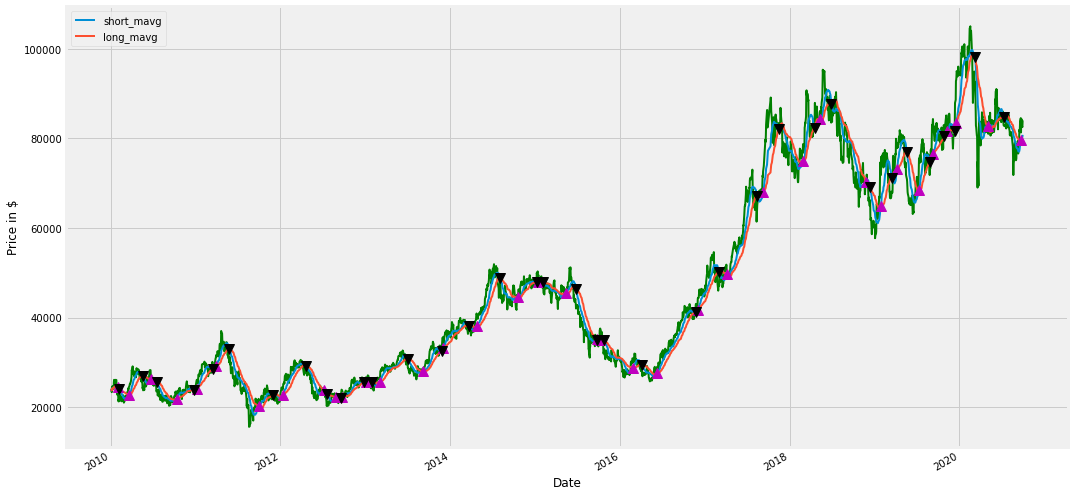

In [95]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

sh['Close'].plot(ax=ax1, color='g', lw=2.)

signals1_sh[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals1_sh.loc[signals1_sh.positions == 1.0].index, 
         signals1_sh.short_mavg[signals1_sh.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals1_sh.loc[signals1_sh.positions == -1.0].index, 
         signals1_sh.short_mavg[signals1_sh.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

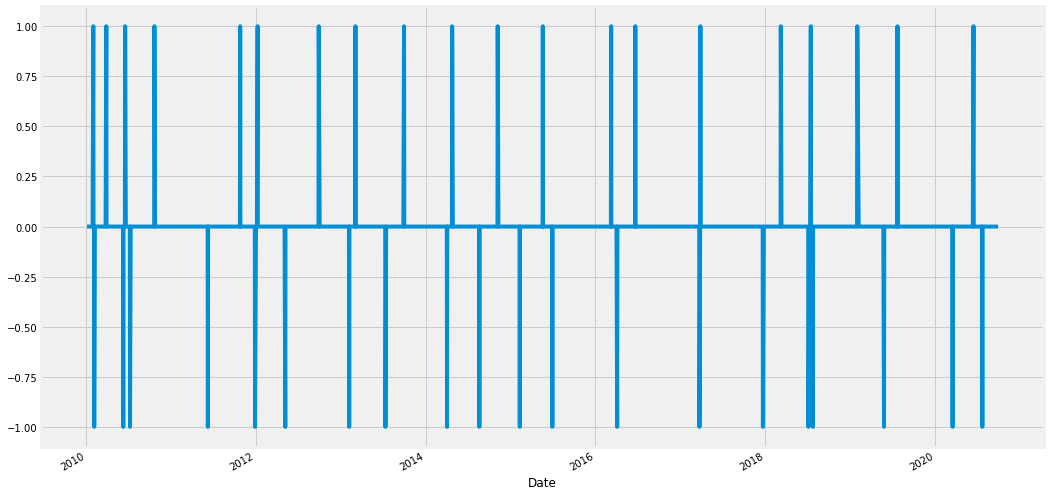

In [96]:
# sk하이닉스 두번째 전략
signals2_sh = pd.DataFrame(index=sh.index)
signals2_sh['signal'] = 0.0

signals2_sh['short_mavg'] = sh['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals2_sh['long_mavg'] = sh['Close'].rolling(window=long_window2, min_periods=1, center=False).mean()

signals2_sh['signal'][short_window:] = np.where(signals2_sh['short_mavg'][short_window:] 
                                            > signals2_sh['long_mavg'][short_window:], 1.0, 0.0)   

signals2_sh['positions'] = signals2_sh['signal'].diff()

signals2_sh.positions.plot(figsize=(16,9))

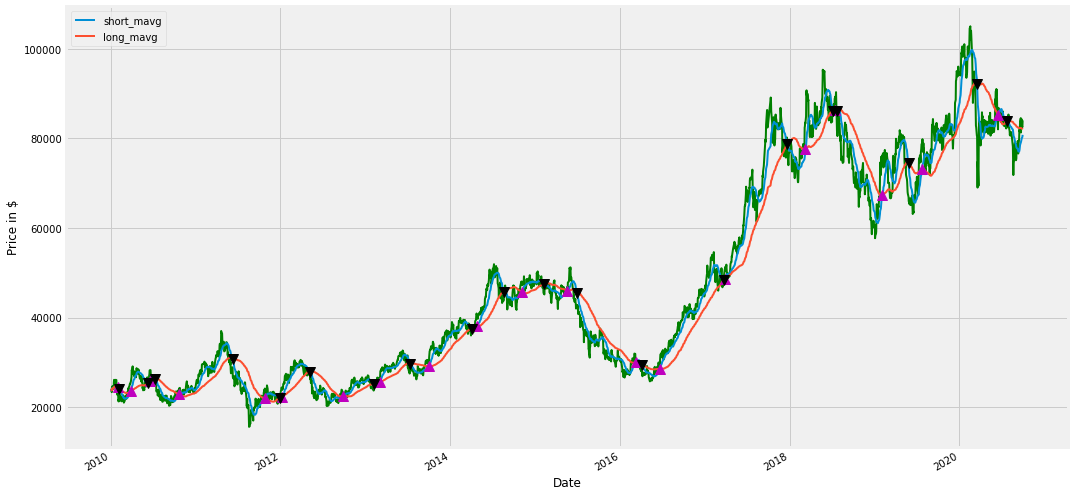

In [97]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

sh['Close'].plot(ax=ax1, color='g', lw=2.)

signals2_sh[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals2_sh.loc[signals2_sh.positions == 1.0].index, 
         signals2_sh.short_mavg[signals2_sh.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals2_sh.loc[signals2_sh.positions == -1.0].index, 
         signals2_sh.short_mavg[signals2_sh.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

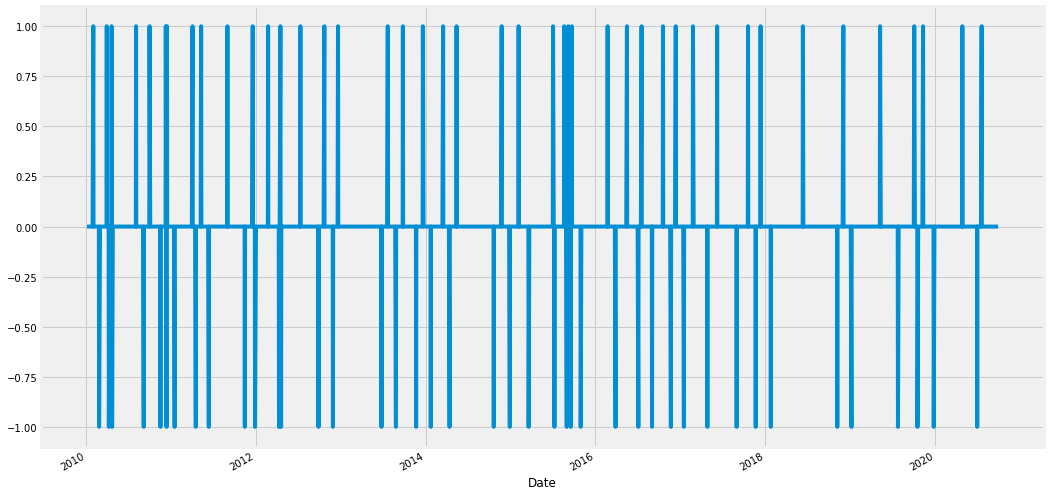

In [98]:
# sk텔레콤 첫 번째 전략
signals1_st = pd.DataFrame(index=st.index)
signals1_st['signal'] = 0.0

signals1_st['short_mavg'] = st['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals1_st['long_mavg'] = st['Close'].rolling(window=long_window1, min_periods=1, center=False).mean()

signals1_st['signal'][short_window:] = np.where(signals1_st['short_mavg'][short_window:] 
                                            > signals1_st['long_mavg'][short_window:], 1.0, 0.0)   

signals1_st['positions'] = signals1_st['signal'].diff()

signals1_st.positions.plot(figsize=(16,9))

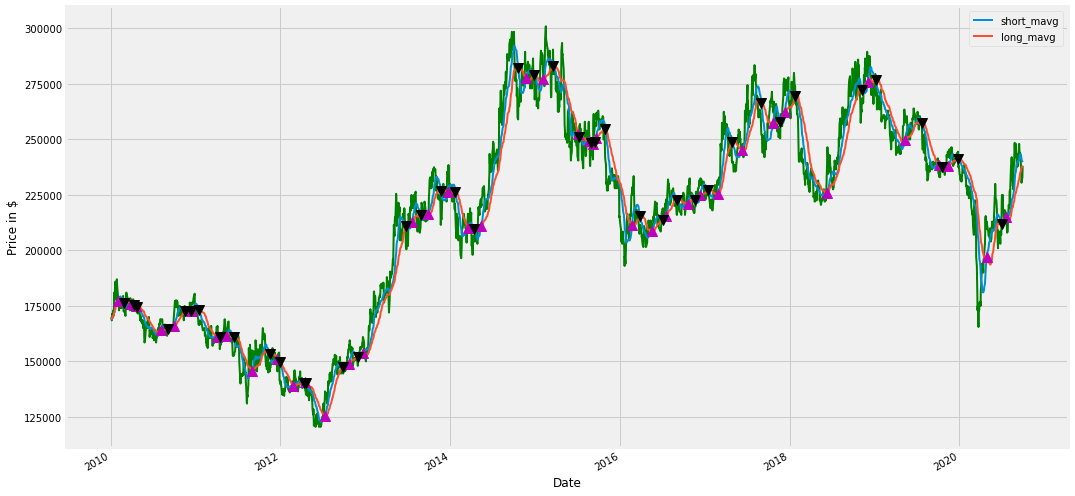

In [99]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

st['Close'].plot(ax=ax1, color='g', lw=2.)

signals1_st[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals1_st.loc[signals1_st.positions == 1.0].index, 
         signals1_st.short_mavg[signals1_st.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals1_st.loc[signals1_st.positions == -1.0].index, 
         signals1_st.short_mavg[signals1_st.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

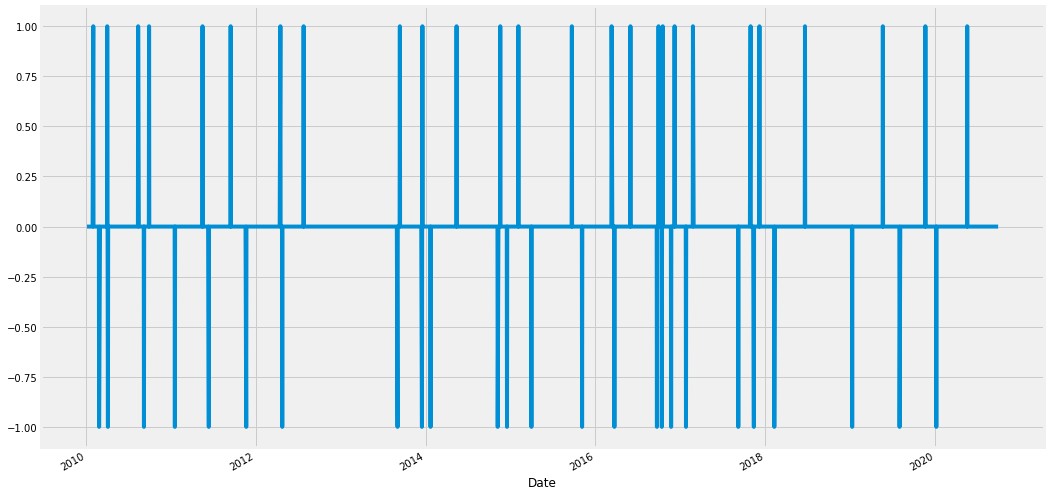

In [100]:
# sk텔레콤 두번째 전략
signals2_st = pd.DataFrame(index=st.index)
signals2_st['signal'] = 0.0

signals2_st['short_mavg'] = st['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals2_st['long_mavg'] = st['Close'].rolling(window=long_window2, min_periods=1, center=False).mean()

signals2_st['signal'][short_window:] = np.where(signals2_st['short_mavg'][short_window:] 
                                            > signals2_st['long_mavg'][short_window:], 1.0, 0.0)   

signals2_st['positions'] = signals2_st['signal'].diff()

signals2_st.positions.plot(figsize=(16,9))

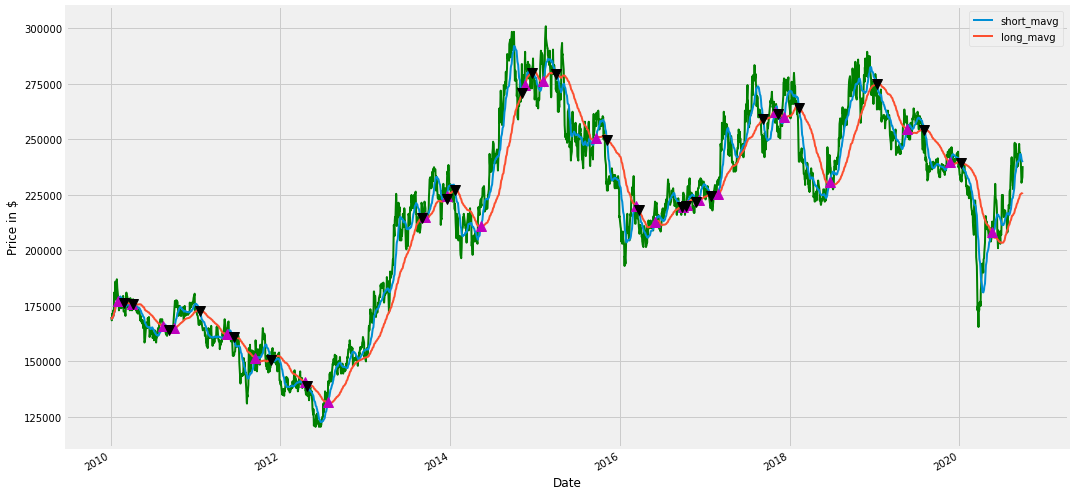

In [101]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

st['Close'].plot(ax=ax1, color='g', lw=2.)

signals2_st[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals2_st.loc[signals2_st.positions == 1.0].index, 
         signals2_st.short_mavg[signals2_st.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals2_st.loc[signals2_st.positions == -1.0].index, 
         signals2_st.short_mavg[signals2_st.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

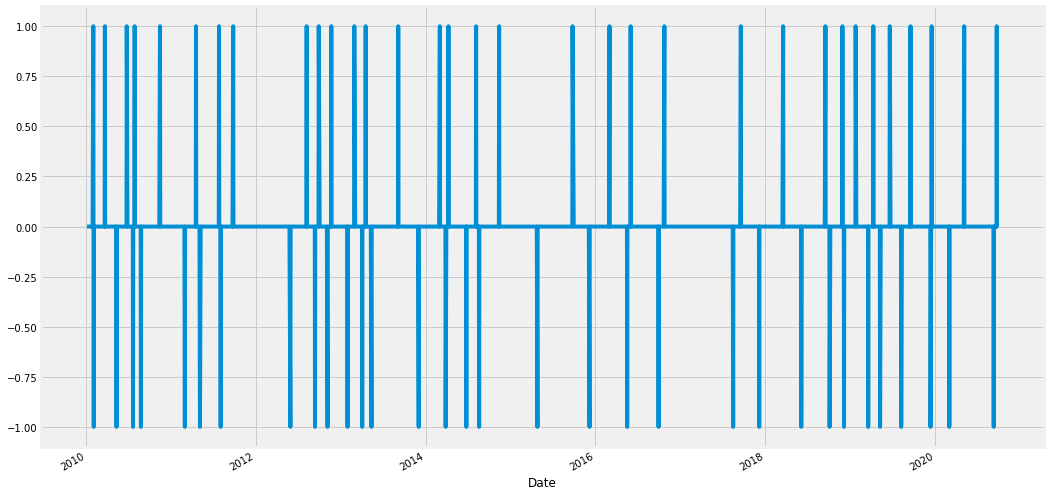

In [102]:
# 삼성전자 첫 번째 전략
signals1_ss = pd.DataFrame(index=ss.index)
signals1_ss['signal'] = 0.0

signals1_ss['short_mavg'] = ss['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals1_ss['long_mavg'] = ss['Close'].rolling(window=long_window1, min_periods=1, center=False).mean()

signals1_ss['signal'][short_window:] = np.where(signals1_ss['short_mavg'][short_window:] 
                                            > signals1_ss['long_mavg'][short_window:], 1.0, 0.0)   

signals1_ss['positions'] = signals1_ss['signal'].diff()

signals1_ss.positions.plot(figsize=(16,9))

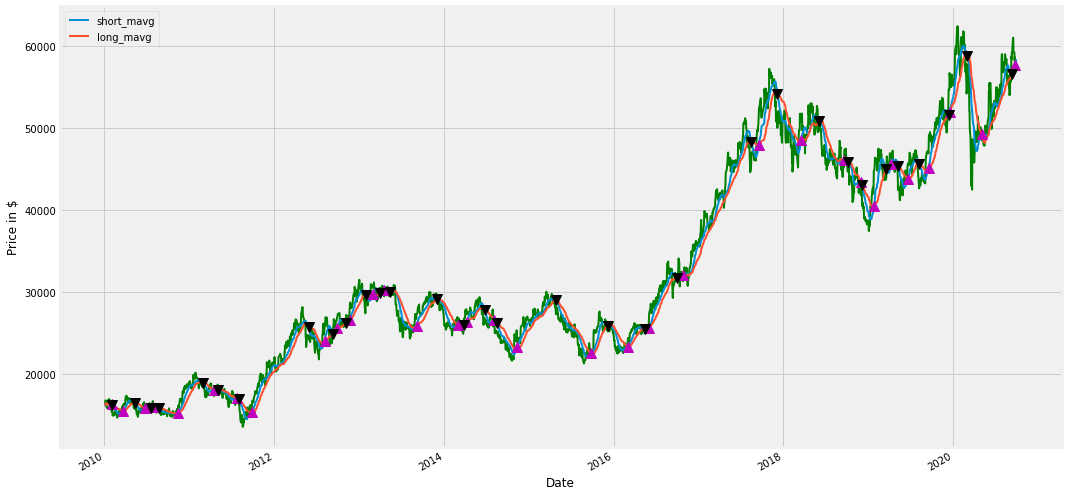

In [103]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

ss['Close'].plot(ax=ax1, color='g', lw=2.)

signals1_ss[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals1_ss.loc[signals1_ss.positions == 1.0].index, 
         signals1_ss.short_mavg[signals1_ss.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals1_ss.loc[signals1_ss.positions == -1.0].index, 
         signals1_ss.short_mavg[signals1_ss.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

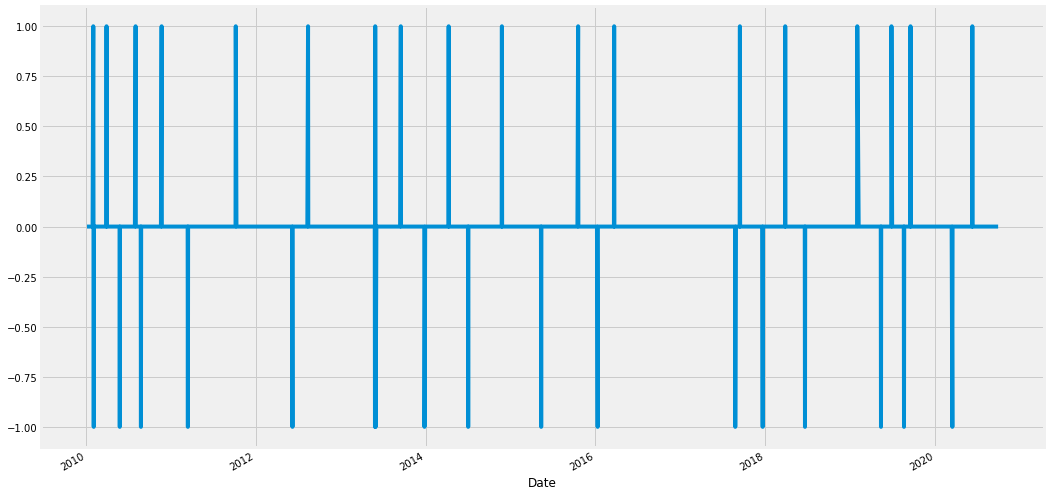

In [104]:
#삼성전자 두번째 전략
signals2_ss = pd.DataFrame(index=ss.index)
signals2_ss['signal'] = 0.0

signals2_ss['short_mavg'] = ss['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals2_ss['long_mavg'] = ss['Close'].rolling(window=long_window2, min_periods=1, center=False).mean()

signals2_ss['signal'][short_window:] = np.where(signals2_ss['short_mavg'][short_window:] 
                                            > signals2_ss['long_mavg'][short_window:], 1.0, 0.0)   

signals2_ss['positions'] = signals2_ss['signal'].diff()

signals2_ss.positions.plot(figsize=(16,9))

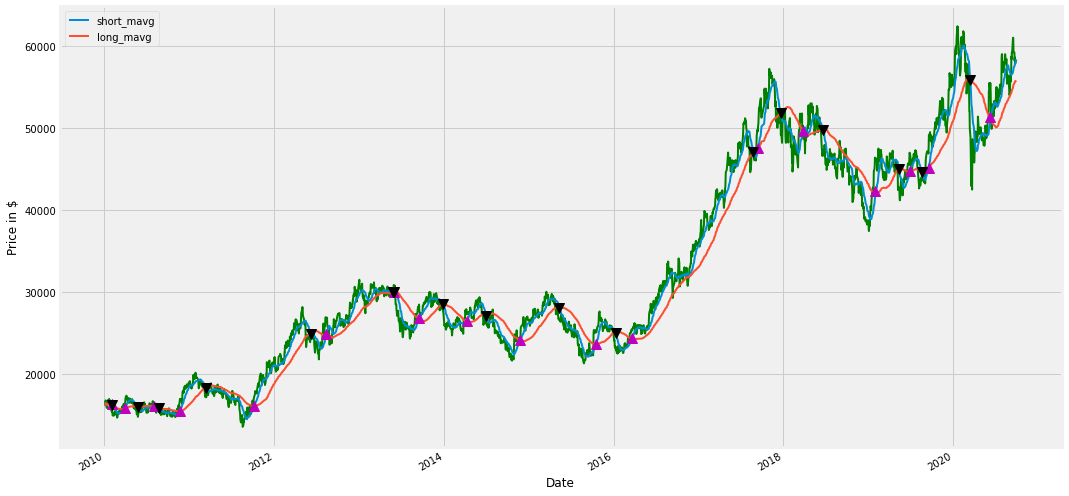

In [105]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,  ylabel='Price in $')

ss['Close'].plot(ax=ax1, color='g', lw=2.)

signals2_ss[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals2_ss.loc[signals2_ss.positions == 1.0].index, 
         signals2_ss.short_mavg[signals2_ss.positions == 1.0],
         '^', markersize=10, color='m')
         
ax1.plot(signals2_ss.loc[signals2_ss.positions == -1.0].index, 
         signals2_ss.short_mavg[signals2_ss.positions == -1.0],
         'v', markersize=10, color='k')
         
plt.show()

## 3번 (b)

In [106]:
#현대차 첫 번째 전략 성과

initial_capital= float(10000000.0)

positions1_hc = pd.DataFrame(index=signals1_hc.index).fillna(0.0)

positions1_hc['HC'] = 100*signals1_hc['signal']   
   
portfolio1_hc = positions1_hc.multiply(hc['Close'], axis=0)

pos_diff1_hc = positions1_hc.diff()

portfolio1_hc['holdings'] = (positions1_hc.multiply(hc['Close'], axis=0)).sum(axis=1)

portfolio1_hc['cash'] = initial_capital - (pos_diff1_hc.multiply(hc['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio1_hc['total'] = portfolio1_hc['cash'] + portfolio1_hc['holdings']

portfolio1_hc['returns'] = portfolio1_hc['total'].pct_change()*100

portfolio1_hc['Close'] = hc['Close']
portfolio1_hc['ret_Close'] = hc['Close'].pct_change()*100

portfolio1_hc['ret_position'] = portfolio1_hc['ret_Close'].mul(signals1_hc['signal'])
portfolio1_hc['signal'] =signals1_hc['signal']
portfolio1_hc['positions'] =signals1_hc['positions']

ret_strategy = portfolio1_hc['ret_position'].sum()
ret_strategy

9.818708007397905

In [107]:
#현대차 두번째 전략 성과

initial_capital= float(10000000.0)

positions2_hc = pd.DataFrame(index=signals2_hc.index).fillna(0.0)

positions2_hc['HC'] = 100*signals2_hc['signal']   
   
portfolio2_hc = positions2_hc.multiply(hc['Close'], axis=0)

pos_diff2_hc = positions2_hc.diff()

portfolio2_hc['holdings'] = (positions2_hc.multiply(hc['Close'], axis=0)).sum(axis=1)

portfolio2_hc['cash'] = initial_capital - (pos_diff2_hc.multiply(hc['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio2_hc['total'] = portfolio2_hc['cash'] + portfolio2_hc['holdings']

portfolio2_hc['returns'] = portfolio2_hc['total'].pct_change()*100

portfolio2_hc['Close'] = hc['Close']
portfolio2_hc['ret_Close'] = hc['Close'].pct_change()*100

portfolio2_hc['ret_position'] = portfolio2_hc['ret_Close'].mul(signals2_hc['signal'])
portfolio2_hc['signal'] =signals2_hc['signal']
portfolio2_hc['positions'] =signals2_hc['positions']

ret_strategy = portfolio2_hc['ret_position'].sum()
ret_strategy

54.20971903913234

In [127]:
#현대차 벤치마크전략 수익률
ret_hc_bm = 100*np.log(hc.Close[-1]/hc.Close[0])
ret_hc_bm

40.546510810816436

In [109]:
#네이버 첫 번째 전략 성과

initial_capital= float(10000000.0)

positions1_nv = pd.DataFrame(index=signals1_nv.index).fillna(0.0)

positions1_nv['HC'] = 100*signals1_nv['signal']   
   
portfolio1_nv = positions1_nv.multiply(nv['Close'], axis=0)

pos_diff1_nv = positions1_nv.diff()

portfolio1_nv['holdings'] = (positions1_nv.multiply(nv['Close'], axis=0)).sum(axis=1)

portfolio1_nv['cash'] = initial_capital - (pos_diff1_nv.multiply(nv['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio1_nv['total'] = portfolio1_nv['cash'] + portfolio1_nv['holdings']

portfolio1_nv['returns'] = portfolio1_nv['total'].pct_change()*100

portfolio1_nv['Close'] = nv['Close']
portfolio1_nv['ret_Close'] = nv['Close'].pct_change()*100

portfolio1_nv['ret_position'] = portfolio1_nv['ret_Close'].mul(signals1_nv['signal'])
portfolio1_nv['signal'] =signals1_nv['signal']
portfolio1_nv['positions'] =signals1_nv['positions']

ret_strategy = portfolio1_nv['ret_position'].sum()
ret_strategy

197.41325823200054

In [110]:
#네이버 두번째 전략 성과

initial_capital= float(10000000.0)

positions2_nv = pd.DataFrame(index=signals2_nv.index).fillna(0.0)

positions2_nv['HC'] = 100*signals2_nv['signal']   
   
portfolio2_nv = positions2_nv.multiply(nv['Close'], axis=0)

pos_diff2_nv = positions2_nv.diff()

portfolio2_nv['holdings'] = (positions2_nv.multiply(nv['Close'], axis=0)).sum(axis=1)

portfolio2_nv['cash'] = initial_capital - (pos_diff2_nv.multiply(nv['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio2_nv['total'] = portfolio2_nv['cash'] + portfolio2_nv['holdings']

portfolio2_nv['returns'] = portfolio2_nv['total'].pct_change()*100

portfolio2_nv['Close'] = nv['Close']
portfolio2_nv['ret_Close'] = nv['Close'].pct_change()*100

portfolio2_nv['ret_position'] = portfolio2_nv['ret_Close'].mul(signals2_nv['signal'])
portfolio2_nv['signal'] =signals2_nv['signal']
portfolio2_nv['positions'] =signals2_nv['positions']

ret_strategy = portfolio2_nv['ret_position'].sum()
ret_strategy

157.00201141176507

In [126]:
#네이버 벤치마크전략 수익률
ret_nv_bm = 100*np.log(nv.Close[-1]/nv.Close[0])
ret_nv_bm

183.52663299287485

In [112]:
#sk하이닉스 첫 번째 전략 성과

initial_capital= float(10000000.0)

positions1_sh = pd.DataFrame(index=signals1_sh.index).fillna(0.0)

positions1_sh['HC'] = 100*signals1_sh['signal']   
   
portfolio1_sh = positions1_sh.multiply(sh['Close'], axis=0)

pos_diff1_sh = positions1_sh.diff()

portfolio1_sh['holdings'] = (positions1_sh.multiply(sh['Close'], axis=0)).sum(axis=1)

portfolio1_sh['cash'] = initial_capital - (pos_diff1_sh.multiply(sh['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio1_sh['total'] = portfolio1_sh['cash'] + portfolio1_sh['holdings']

portfolio1_sh['returns'] = portfolio1_sh['total'].pct_change()*100

portfolio1_sh['Close'] = sh['Close']
portfolio1_sh['ret_Close'] = sh['Close'].pct_change()*100

portfolio1_sh['ret_position'] = portfolio1_sh['ret_Close'].mul(signals1_sh['signal'])
portfolio1_sh['signal'] =signals1_sh['signal']
portfolio1_sh['positions'] =signals1_sh['positions']

ret_strategy = portfolio1_sh['ret_position'].sum()
ret_strategy

122.31652010705756

In [113]:
#sk하이닉스 두번째 전략 성과

initial_capital= float(10000000.0)

positions2_sh = pd.DataFrame(index=signals2_sh.index).fillna(0.0)

positions2_sh['HC'] = 100*signals2_sh['signal']   
   
portfolio2_sh = positions2_sh.multiply(sh['Close'], axis=0)

pos_diff2_sh = positions2_sh.diff()

portfolio2_sh['holdings'] = (positions2_sh.multiply(sh['Close'], axis=0)).sum(axis=1)

portfolio2_sh['cash'] = initial_capital - (pos_diff2_sh.multiply(sh['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio2_sh['total'] = portfolio2_sh['cash'] + portfolio2_sh['holdings']

portfolio2_sh['returns'] = portfolio2_sh['total'].pct_change()*100

portfolio2_sh['Close'] = sh['Close']
portfolio2_sh['ret_Close'] = sh['Close'].pct_change()*100

portfolio2_sh['ret_position'] = portfolio2_sh['ret_Close'].mul(signals2_sh['signal'])
portfolio2_sh['signal'] =signals2_sh['signal']
portfolio2_sh['positions'] =signals2_sh['positions']

ret_strategy = portfolio2_sh['ret_position'].sum()
ret_strategy

140.02167573849073

In [125]:
#sk하이닉스 벤치마크전략 수익률
ret_sh_bm = 100*np.log(sh.Close[-1]/sh.Close[0])
ret_sh_bm

124.86049583467043

In [115]:
#sk텔레콤 첫 번째 전략 성과

initial_capital= float(10000000.0)

positions1_st = pd.DataFrame(index=signals1_st.index).fillna(0.0)

positions1_st['HC'] = 100*signals1_st['signal']   
   
portfolio1_st = positions1_st.multiply(st['Close'], axis=0)

pos_diff1_st = positions1_st.diff()

portfolio1_st['holdings'] = (positions1_st.multiply(st['Close'], axis=0)).sum(axis=1)

portfolio1_st['cash'] = initial_capital - (pos_diff1_st.multiply(st['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio1_st['total'] = portfolio1_st['cash'] + portfolio1_st['holdings']

portfolio1_st['returns'] = portfolio1_st['total'].pct_change()*100

portfolio1_st['Close'] = st['Close']
portfolio1_st['ret_Close'] = st['Close'].pct_change()*100

portfolio1_st['ret_position'] = portfolio1_st['ret_Close'].mul(signals1_st['signal'])
portfolio1_st['signal'] =signals1_st['signal']
portfolio1_st['positions'] =signals1_st['positions']

ret_strategy = portfolio1_st['ret_position'].sum()
ret_strategy

10.35679480815519

In [116]:
#sk텔레콤 두번째 전략 성과

initial_capital= float(10000000.0)

positions2_st = pd.DataFrame(index=signals2_st.index).fillna(0.0)

positions2_st['HC'] = 100*signals2_st['signal']   
   
portfolio2_st = positions2_st.multiply(st['Close'], axis=0)

pos_diff2_st = positions2_st.diff()

portfolio2_st['holdings'] = (positions2_st.multiply(st['Close'], axis=0)).sum(axis=1)

portfolio2_st['cash'] = initial_capital - (pos_diff2_st.multiply(st['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio2_st['total'] = portfolio2_st['cash'] + portfolio2_st['holdings']

portfolio2_st['returns'] = portfolio2_st['total'].pct_change()*100

portfolio2_st['Close'] = st['Close']
portfolio2_st['ret_Close'] = st['Close'].pct_change()*100

portfolio2_st['ret_position'] = portfolio2_st['ret_Close'].mul(signals2_st['signal'])
portfolio2_st['signal'] =signals2_st['signal']
portfolio2_st['positions'] =signals2_st['positions']

ret_strategy = portfolio2_st['ret_position'].sum()
ret_strategy

52.680069087173194

In [121]:
#sk텔레콤 벤치마크전략 수익률
ret_st_bm = 100*np.log(st.Close[-1]/st.Close[0])
ret_st_bm

33.64722366212129

In [122]:
#삼성 첫 번째 전략 성과

initial_capital= float(10000000.0)

positions1_ss = pd.DataFrame(index=signals1_ss.index).fillna(0.0)

positions1_ss['SS'] = 100*signals1_ss['signal']
   
portfolio1_ss = positions1_ss.multiply(ss['Close'], axis=0)

pos_diff1_ss = positions1_ss.diff()

portfolio1_ss['holdings'] = (positions1_ss.multiply(ss['Close'], axis=0)).sum(axis=1)

portfolio1_ss['cash'] = initial_capital - (pos_diff1_ss.multiply(ss['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio1_ss['total'] = portfolio1_ss['cash'] + portfolio1_ss['holdings']

portfolio1_ss['returns'] = portfolio1_ss['total'].pct_change()*100

portfolio1_ss['Close'] = ss['Close']
portfolio1_ss['ret_Close'] = ss['Close'].pct_change()*100

portfolio1_ss['ret_position'] = portfolio1_ss['ret_Close'].mul(signals1_ss['signal'])
portfolio1_ss['signal'] =signals1_ss['signal']
portfolio1_ss['positions'] =signals1_ss['positions']

ret_strategy = portfolio1_ss['ret_position'].sum()
ret_strategy

173.55374438446654

In [123]:
#삼성 두번째 전략 성과

initial_capital= float(10000000.0)

positions2_ss = pd.DataFrame(index=signals2_ss.index).fillna(0.0)

positions2_ss['SS'] = 100*signals2_ss['signal']   
   
portfolio2_ss = positions2_ss.multiply(ss['Close'], axis=0)

pos_diff2_ss = positions2_ss.diff()

portfolio2_ss['holdings'] = (positions2_ss.multiply(ss['Close'], axis=0)).sum(axis=1)

portfolio2_ss['cash'] = initial_capital - (pos_diff2_ss.multiply(ss['Close'], axis=0)).sum(axis=1).cumsum()   

portfolio2_ss['total'] = portfolio2_ss['cash'] + portfolio2_ss['holdings']

portfolio2_ss['returns'] = portfolio2_ss['total'].pct_change()*100

portfolio2_ss['Close'] = ss['Close']
portfolio2_ss['ret_Close'] = ss['Close'].pct_change()*100

portfolio2_ss['ret_position'] = portfolio2_ss['ret_Close'].mul(signals2_ss['signal'])
portfolio2_ss['signal'] =signals2_ss['signal']
portfolio2_ss['positions'] =signals2_ss['positions']

ret_strategy = portfolio2_ss['ret_position'].sum()
ret_strategy

121.09911472430726

In [131]:
#삼성 벤치마크전략 수익률
ret_ss_bm = 100*np.log(ss.Close[-1]/ss.Close[0])
ret_ss_bm

128.01094431070464

## 이 기간에 대해서 모든 전략을 비교해 볼 때, 현대차는 두번째 전략의 성과가, 네이버는 첫번째 전략의 성과가, SK하이닉스는 두번째 전략의 성과가, SK텔레콤은 두번째 전략의 성과가, 삼성은 첫번째 전략의 성과가 제일 좋은 것으로 보인다. 처음 두 전략은 단기균형과 장기균형을 비교해 사고파는 행위를 반복하고 그에 반해 벤치마크 전략은 시작 시점의 종가와 마지막 시점의 종가의 log difference인 수익률이기 때문에 차이가 생긴다.